<h2 align="left"><font color=#854720>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:#9eb413; font-family:calibri; color: #854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>


In [96]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px

In [97]:
class colorss:
    yellows=['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404','#a70000','#ff5252','#ff7b7b','#ffbaba']
    greens=['#ffffd4','#fee391','#fec44f','#fe9929','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#005a32']
cmaps=['flare','icefire','bwr_r','Accent','Spectral','RdGy','afmhot_r','afmhot','inferno','seismic','vlag','vlag_r']

<a id="read"></a>
# <p style="background-color:#9eb413 ; font-family:calibri; color:#854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>


In [98]:
df=pd.read_csv("./Dataset/yield_df.csv")

In [99]:
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:120%; text-align:left">

<h2 align="left"><font color=#9eb413>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __Area__ | Country names that plant crops |
| __Item__ | Types of crops planted |
| __Year__ | Time of planted crops in years 1990-2013 |
| __average_rain_fall_mm_per_year__ | Average rain fall per year |
| __pesticides_tonnes__ | Pesticides used in tonnes |                     
| __avg_temp__ | Average temperature |
| __hg/ha_yield__ | Crops yield production value in hectogram per hectare (Hg/Ha) |  

<a id="overview"></a>
# <p style="background-color:#9eb413; font-family:calibri; color:#854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>


<a id="basic"></a>
# <b><span style='color: #9eb413'>Step 3.1 |</span><span style='color:#854720'> Dataset Basic Information</span></b>

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Number of Entries__: The dataset consists of __28242 entries__, ranging from index 0 to 28241.
    
    
* __Columns__: There are __8 columns__ in the dataset.
    
    
* __Data Types__:
    - Most of the columns (6 out of 8) are of the __int64__ & __float64__ data type.
    - Only the Item and Area columns are of the object data type.
    
    
* __Missing Values__: There doesn't appear to be any missing values in the dataset as each column has 28242 non-null entries.

<a id="num_statistics"></a>
# <b><span style='color:#9eb413'>Step 3.2 |</span><span style='color:#854720'> Summary Statistics for Numerical Variables</span></b>

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,28242.0,14120.500000,8152.907488,0.00,7060.2500,14120.50,21180.75,28241.00
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


 <div style="border-radius:10px; padding: 15px; background-color:#854720 ; font-size:115%; text-align:left;">

<h3 align="left"><font color=#9eb413>Numerical Features:</font></h3>

* __`average_rain_fall_mm_per_year`__: The average rainfall per year is approximately 1149, with the least rainfall being 51 and the most 3240.
* __`pesticides_tonnes`__: The mean pesticides used in tonnes is a whopping 37077 tonnes, with minimum as little as 0.04 and maximum as huge as 367778 tonnes.
* __`hg/ha_yield`__: The average crop production yield is 77053.3. Ranging from 50 all the way to 501412 hectograms per hectare.

<a id="cat_statistics"></a>
# <b><span style='color:#9eb413'>Step 3.3 |</span><span style='color:#854720'> Summary Statistics for Categorical  Variables</span></b>

In [102]:
df.describe(include='object')

,Area,Item
count,28242,28242
unique,101,10
top,India,Potatoes
freq,4048,4276


<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h3 align="left"><font color=#9eb413>Categorical Features (object data type):</font></h3>

* __`Area`__: There are **101** unique countries/areas, with **India** being the most frequent category, occurring **4048** times out of **28242** entries.
* __`Item`__: **10** unique types of crops are present. The most common type is "__Potatoes__", occurring **4276** times.

<a id="eda"></a>
# <p style="background-color:#9eb413; font-family:calibri; color:#854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>


In [103]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [104]:
# remove countries with less than 100 record
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[~df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)

In [105]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Algeria,Maize,1990,16500,89.0,1828.92,17.48
1,Algeria,Potatoes,1990,78936,89.0,1828.92,17.48
2,Algeria,"Rice, paddy",1990,28000,89.0,1828.92,17.48
3,Algeria,Sorghum,1990,16571,89.0,1828.92,17.48
4,Algeria,Wheat,1990,6315,89.0,1828.92,17.48
...,...,...,...,...,...,...,...
26292,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
26293,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
26294,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
26295,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [106]:
datacorr=df.copy()

In [107]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

<Axes: >

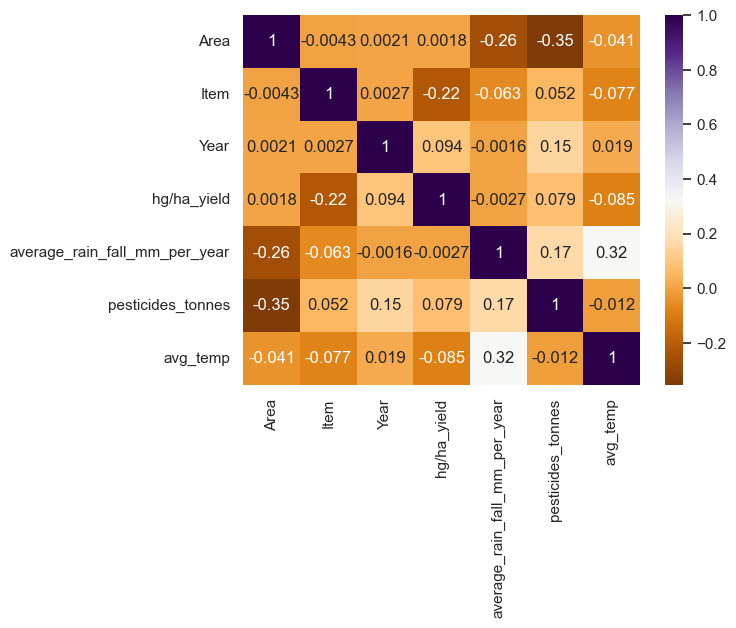

In [108]:
sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Area__: There's a strong correlation between __Area__ and __pesticides_tonnes__, along with __Area__ and __average rainfall__
    
    
* __Items__: There's a strong correlation between __Item__ and __hg/ha_yield__
    

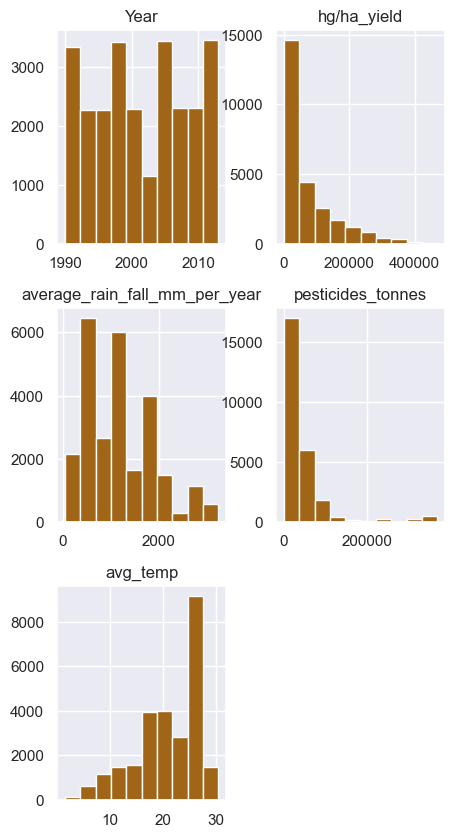

In [109]:
sns.set(palette='BrBG')
df.hist(figsize=(5,10));

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __rainfall__: Most rainfall is between __0-1000__ and very few is around __3000__
    
    
* __pesticides_tonnes__: The majority of used pesticides is __little to zero__
* __avg_temp__: Most average temperatures is around 25.
*__hg/ha yield__: There is a vast majority of yield production around 0.
    

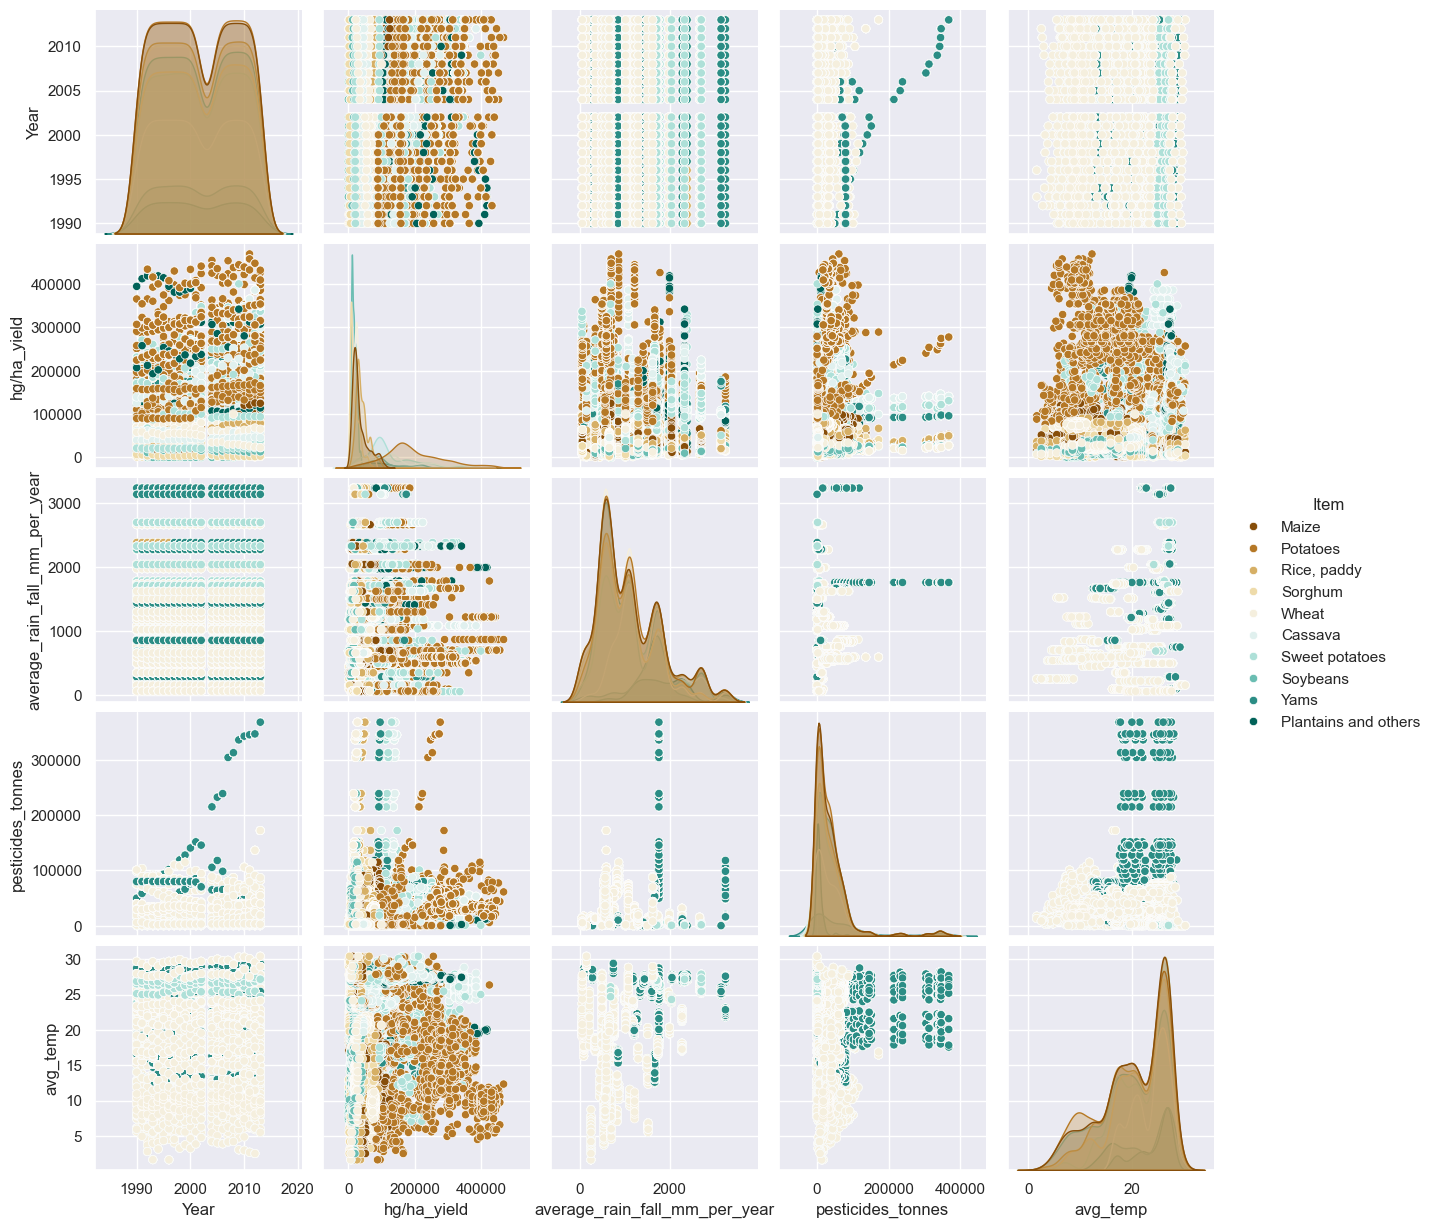

In [110]:
sns.pairplot(data=df,hue='Item',kind='scatter',palette='BrBG')

<Axes: xlabel='Year'>

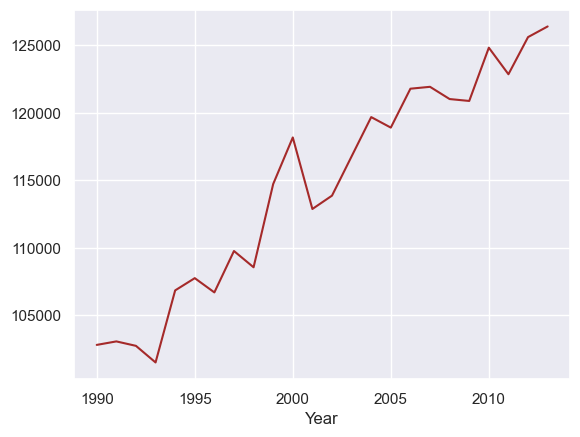

In [111]:
df2=df[df['Item']=='Yams']
df2.groupby('Year')['hg/ha_yield'].mean().plot(color='brown')

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Items__: 
    * __yams__: It appears that __yams__ uses __a lot__ of pesticides, grow on __all__ rainfall ranges.
    * __wheat__: __Wheat__ thrives on __all__ average temperature ranges and grows on __average to no__ rainfall.
* __year__:
    * __2003-2013__: Starting from 2003 to 2013, __more and more__ pesticides were used on __yams__ to **increase** its productivity.  
    
* __hg/ha_yield__: __Sorghum__ and __Soybeans__ are lowest in yield production while __potatoes__ are most popular.
    

<Axes: xlabel='Item', ylabel='hg/ha_yield'>

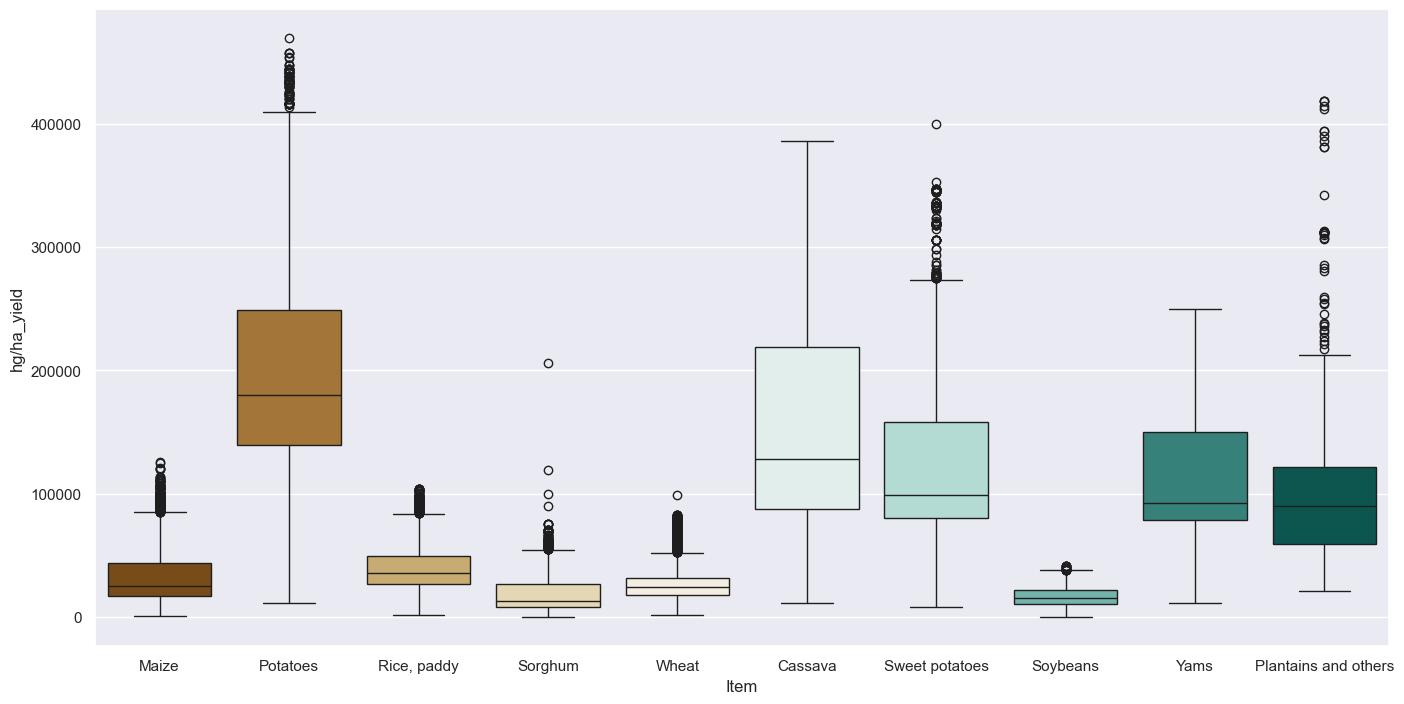

In [112]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="BrBG",data=df,ax=ax)

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  __Top__ producing items: __potatoes, cassava__
* __Least__ producing items: __soybeans, sorghum, wheat, maize, and rice, paddy__

In [113]:
grouped = df.groupby('Item')

best_areas = []

for item, group in grouped:
    max_production_row = group[group['hg/ha_yield'] == group['hg/ha_yield'].max()]
    
    area = max_production_row['Area'].values[0]
    production = max_production_row['hg/ha_yield'].values[0]
    
    best_areas.append({'Item': item, 'Area': area, 'hg/ha_yield': production})

best_areas_df = pd.DataFrame(best_areas)

best_areas_df

,Item,Area,hg/ha_yield
0,Cassava,India,385818
1,Maize,Tajikistan,125670
2,Plantains and others,Guatemala,418505
3,Potatoes,France,468991
4,"Rice, paddy",Australia,103895
5,Sorghum,Algeria,206000
6,Soybeans,Turkey,41609
7,Sweet potatoes,Senegal,400000
8,Wheat,Zambia,99387
9,Yams,Mali,250000


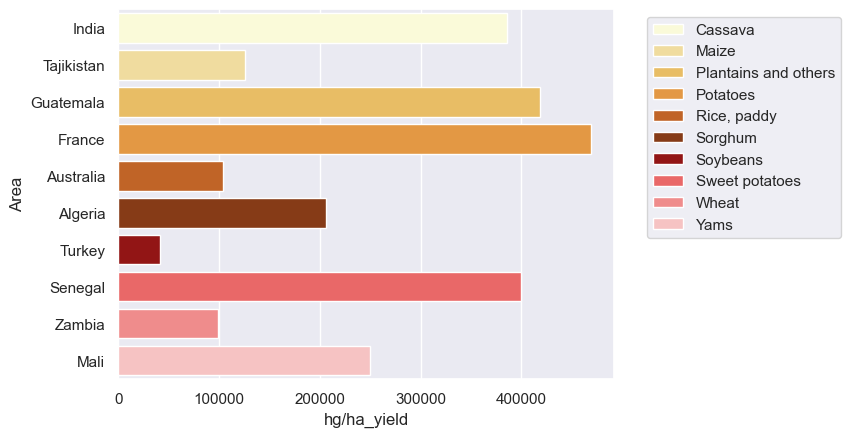

In [114]:
ax=sns.barplot(data=best_areas_df,x='hg/ha_yield',y='Area',hue='Item',palette=colorss.yellows)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Cassava__: __India__ is the top at producing __Cassava__
* __Maize__: __Tajikistan__ excels at growing __Maize__
* __PLantains and others__: __Guatemala__ is the best source of __PLantains and others__
* __Potatoes__: __France__ is the top at producing __potatoes__
* __Rice, paddy__: __Australia__ is the leading country in producing __rice, paddy__
* __Sorghum__: __Algeria__ excels at producing __sorghum__
* __Soybeans__: __Turkey__ is unrivalled in producing __soybeans__ 
* __Sweet potatoes__: __Senegal__ is the best at producing __sweet potatoes__
* __Wheat__: __Zambbia__ surpasses every country at producing __wheat__
* __Yams__: __Mali__ outshines all countries in growing __yams__

In [115]:
def change_of_years(data, template='seaborn'):
    col = data.columns[3:].tolist()
    for i in col:
        sns.lineplot(data.groupby(['Year'])[i].mean(),color='brown')
        plt.title=f'Effect of Years on the {i}'
        

        plt.show()
        yield()

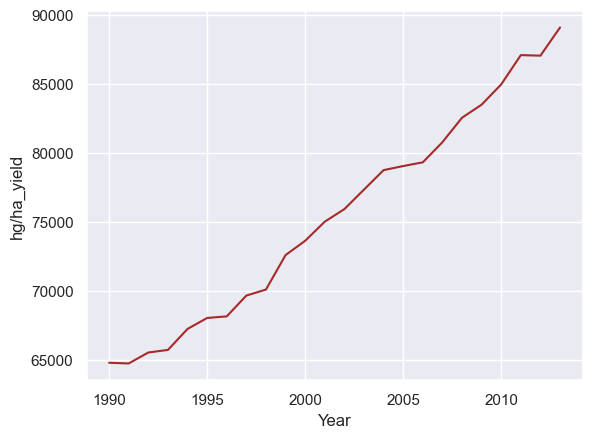

In [116]:
yplot = change_of_years(df)
next(yplot);

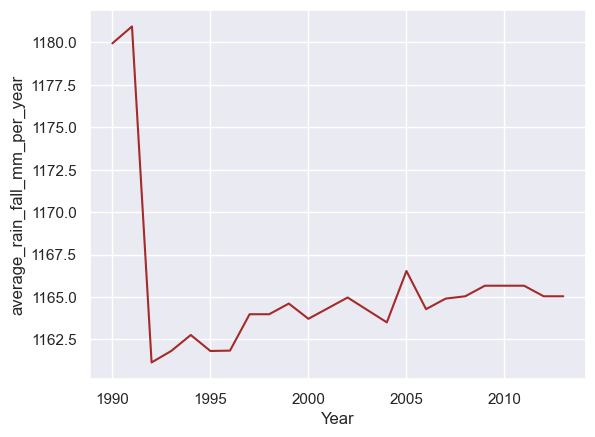

In [117]:
next(yplot);

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  __pesticides__ have been **increasing** significantly since __2003__
    
    

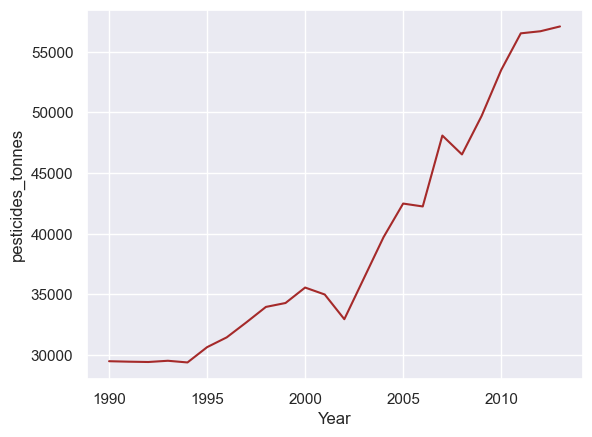

In [118]:
next(yplot);

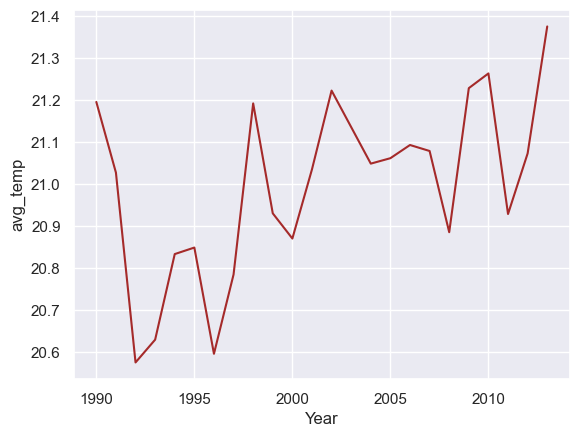

In [119]:
next(yplot);

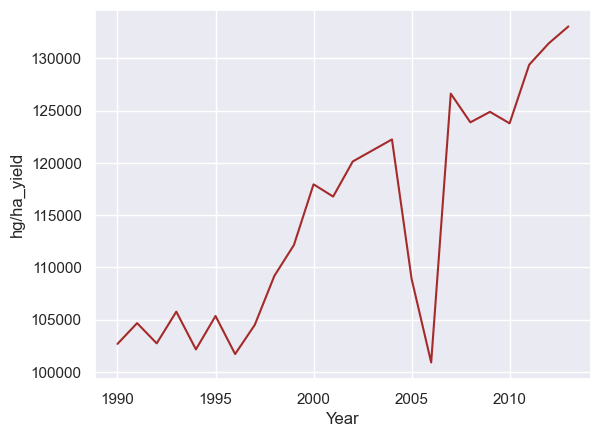

In [120]:
df_Egypt = df.loc[df['Area'] == 'Egypt']
yplot = change_of_years(df_Egypt)
next(yplot);

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  A significant __decrease__ in pesticides occurred between __1993-2005__ then it **increased** even higher than its starting value

<a id="read"></a>
# <p style="background-color:#9eb413 ; font-family:calibri; color:#854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Model building and evaluation</p>


In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


In [122]:
X, y = datacorr.drop(labels='hg/ha_yield', axis=1), datacorr['hg/ha_yield']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The accuracy of the Linear Regression Model Train is 7.39
The accuracy of the  Linear Regression Model Test is 7.37


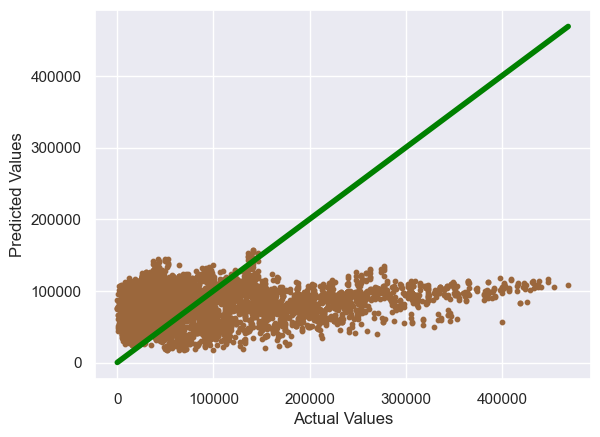

The accuracy of the KNN Model Train is 56.73
The accuracy of the  KNN Model Test is 28.90


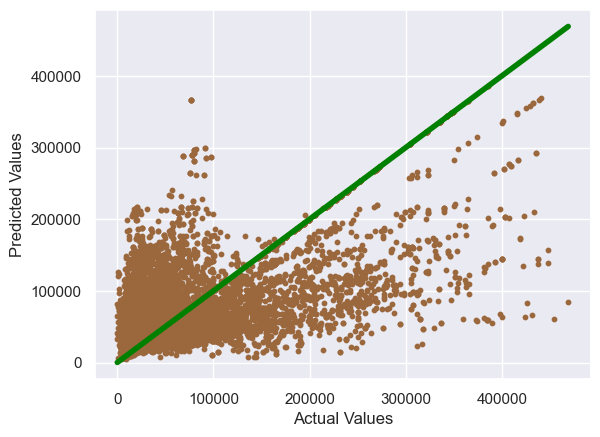

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 97.62


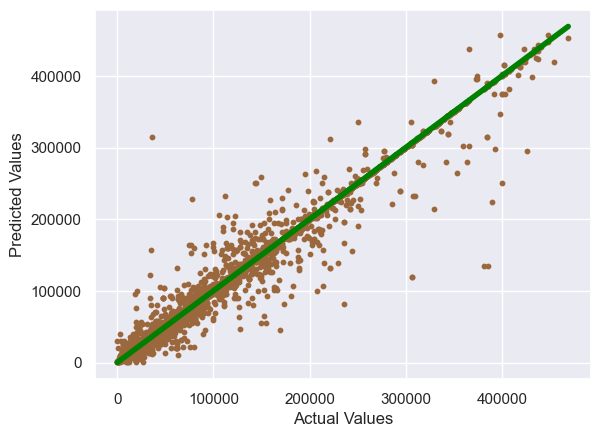

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.073724,6293718529.871189,0.073724
1,KNN,0.289040,4830726834.121146,0.289040
2,Decision Tree,0.976174,161890347.543726,0.976174


In [124]:

results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')    
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
#     plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

# df_styled_worst = dff.style.highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)
# display(df_styled_worst)

# Kefold

In [125]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, MAE, MAPE, R2_score))
    
    print(name)
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True)
    scores = cross_val_score(model, X, y, cv=kf)

    for fold, score in enumerate(scores):
        print(f"Fold {fold+1}: {score}")

    mean_score = np.mean(scores)
    print(f"Mean Score: {mean_score}")
    print('-'*30)
        

df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'MAE', 'MAPE', 'R2_score'])
df_styled_best = df.style.highlight_max(subset=['Accuracy','R2_score'], color='lightblue').highlight_min(subset=['MSE','MAE','MAPE'], color='lightblue').highlight_max(subset=['MSE','MAE','MAPE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)

Linear Regression
Fold 1: 0.0746290695747901
Fold 2: 0.07457505857699087
Fold 3: 0.07560234364852003
Fold 4: 0.07028594492413398
Fold 5: 0.06967502244677082
Mean Score: 0.07295348783424116
------------------------------
KNN
Fold 1: 0.3479586577201923
Fold 2: 0.3335189791006684
Fold 3: 0.3360430357027886
Fold 4: 0.332692259549074
Fold 5: 0.3259539801910595
Mean Score: 0.3352333824527566
------------------------------
Decision Tree
Fold 1: 0.9788884102993854
Fold 2: 0.9817471084060424
Fold 3: 0.9808535586395931
Fold 4: 0.9793466933685397
Fold 5: 0.9741860258292987
Mean Score: 0.979004359308572
------------------------------


,Model,Accuracy,MSE,MAE,MAPE,R2_score
0,Linear Regression,0.073724,6293718529.871189,60955.317749,2.419536,0.073724
1,KNN,0.289040,4830726834.121146,47667.896781,1.624089,0.289040
2,Decision Tree,0.976174,161890347.543726,3559.269202,0.096101,0.976174
